In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import string
from wordcloud import WordCloud

In [4]:
news = pd.read_excel('politik.xlsx')


In [5]:
news.tail(10)

,Date,Headline,Link,Content
8674,08 Sep 2022 22:01,Ibu-ibu di Gresik Dukung Gus Muhaimin Nyapres ...,https://news.detik.com/berita/d-6281056/ibu-ib...,"Ribuan ibu-ibu di Kabupaten Gresik, Jawa Timur..."
8675,08 Sep 2022 13:58,"NasDem Umumkan Bakal Capres 10 November, PAN I...",https://news.detik.com/pemilu/d-6279897/nasdem...,PAN ikut menyambut baik rencana Partai NasDem ...
8676,08 Sep 2022 11:54,Mardani soal Koalisi: PKS Dekat dengan NasDem-...,https://news.detik.com/pemilu/d-6279579/mardan...,Ketua DPP PKS Mardani Ali Sera mengungkap perk...
8677,08 Sep 2022 10:42,Kalkulasi Pendamping Prabowo,https://news.detik.com/kolom/d-6279424/kalkula...,"Koalisi dua partai besar, Gerindra dan PKB, me..."
8678,08 Sep 2022 10:17,Jawaban Sandiaga Uno Disebut Pengkhianat Gerindra,https://www.detik.com/bali/berita/d-6279382/ja...,Politikus Gerindra Arief Poyuono menyebut Sand...
8679,08 Sep 2022 08:46,Demokrat Sambut Baik NasDem Umumkan Bacapres 1...,https://news.detik.com/pemilu/d-6279239/demokr...,Partai Demokrat (PD) menyambut baik kabar Part...
8680,08 Sep 2022 08:32,Teka-teki Bakal Capres NasDem di Hari Pahlawan,https://news.detik.com/pemilu/d-6279225/teka-t...,Partai NasDem sampai saat ini belum juga mengu...
8681,08 Sep 2022 06:35,Anies dan Ganjar Bisa Maju Sebagai Capres atau...,https://news.detik.com/berita/d-6279136/anies-...,Ketua Umum Partai Nasdem Surya Paloh mengataka...
8682,07 Sep 2022 21:53,"Survei Capres Indo Riset: Ganjar 23,2 Persen, ...",https://news.detik.com/pemilu/d-6278939/survei...,Lembaga survei Indo Riset merilis hasil survei...
8683,07 Sep 2022 16:35,Cak Imin soal Duet Prabowo-Puan: Kalau Mau Men...,https://news.detik.com/pemilu/d-6278255/cak-im...,Ketua Umum PKB Abdul Muhaimin Iskandar (Cak Im...


In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      8684 non-null   object
 1   Headline  8684 non-null   object
 2   Link      8684 non-null   object
 3   Content   8683 non-null   object
dtypes: object(4)
memory usage: 271.5+ KB


In [7]:
# Dictionary untuk mengonversi nama bulan dari Bahasa Indonesia ke Bahasa Inggris
bulan_mapping = {
    'Jan': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Apr', 'Mei': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Agu': 'Aug', 'Sep': 'Sep', 'Okt': 'Oct', 'Nov': 'Nov', 'Des': 'Dec'
}

news['Date'] = news['Date'].str.strip()

# Fungsi untuk mengganti nama bulan dalam string tanggal
def ganti_nama_bulan(date_str):
    for indo, eng in bulan_mapping.items():
        if indo in date_str:
            return date_str.replace(indo, eng)
    return date_str

# Mengaplikasikan fungsi penggantian nama bulan ke kolom 'Date'
news['Date'] = news['Date'].apply(ganti_nama_bulan)

# Mengubah tipe data dari object ke datetime dengan format yang sesuai
news['Date_as_datetime'] = pd.to_datetime(news['Date'], format='%d %b %Y %H:%M')

In [8]:
news.tail(10)

,Date,Headline,Link,Content,Date_as_datetime
8674,08 Sep 2022 22:01,Ibu-ibu di Gresik Dukung Gus Muhaimin Nyapres ...,https://news.detik.com/berita/d-6281056/ibu-ib...,"Ribuan ibu-ibu di Kabupaten Gresik, Jawa Timur...",2022-09-08 22:01:00
8675,08 Sep 2022 13:58,"NasDem Umumkan Bakal Capres 10 November, PAN I...",https://news.detik.com/pemilu/d-6279897/nasdem...,PAN ikut menyambut baik rencana Partai NasDem ...,2022-09-08 13:58:00
8676,08 Sep 2022 11:54,Mardani soal Koalisi: PKS Dekat dengan NasDem-...,https://news.detik.com/pemilu/d-6279579/mardan...,Ketua DPP PKS Mardani Ali Sera mengungkap perk...,2022-09-08 11:54:00
8677,08 Sep 2022 10:42,Kalkulasi Pendamping Prabowo,https://news.detik.com/kolom/d-6279424/kalkula...,"Koalisi dua partai besar, Gerindra dan PKB, me...",2022-09-08 10:42:00
8678,08 Sep 2022 10:17,Jawaban Sandiaga Uno Disebut Pengkhianat Gerindra,https://www.detik.com/bali/berita/d-6279382/ja...,Politikus Gerindra Arief Poyuono menyebut Sand...,2022-09-08 10:17:00
8679,08 Sep 2022 08:46,Demokrat Sambut Baik NasDem Umumkan Bacapres 1...,https://news.detik.com/pemilu/d-6279239/demokr...,Partai Demokrat (PD) menyambut baik kabar Part...,2022-09-08 08:46:00
8680,08 Sep 2022 08:32,Teka-teki Bakal Capres NasDem di Hari Pahlawan,https://news.detik.com/pemilu/d-6279225/teka-t...,Partai NasDem sampai saat ini belum juga mengu...,2022-09-08 08:32:00
8681,08 Sep 2022 06:35,Anies dan Ganjar Bisa Maju Sebagai Capres atau...,https://news.detik.com/berita/d-6279136/anies-...,Ketua Umum Partai Nasdem Surya Paloh mengataka...,2022-09-08 06:35:00
8682,07 Sep 2022 21:53,"Survei Capres Indo Riset: Ganjar 23,2 Persen, ...",https://news.detik.com/pemilu/d-6278939/survei...,Lembaga survei Indo Riset merilis hasil survei...,2022-09-07 21:53:00
8683,07 Sep 2022 16:35,Cak Imin soal Duet Prabowo-Puan: Kalau Mau Men...,https://news.detik.com/pemilu/d-6278255/cak-im...,Ketua Umum PKB Abdul Muhaimin Iskandar (Cak Im...,2022-09-07 16:35:00


In [9]:
# Membuat kolom 'date' yang berisi hanya tanggal (hari)
news['date'] = news['Date_as_datetime'].dt.day

# Membuat kolom 'month_year' yang berisi bulan dan tahun
news['month_year'] = news['Date_as_datetime'].dt.strftime('%m-%Y')

# Membuat kolom 'time' yang berisi hanya waktu
news['time'] = news['Date_as_datetime'].dt.time

news.head(10)

,Date,Headline,Link,Content,Date_as_datetime,date,month_year,time
0,30 Jan 2024 22:20,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,https://www.detik.com/jogja/berita/d-7168915/g...,Capres nomor urut 3 Ganjar Pranowo merasa terh...,2024-01-30 22:20:00,30,01-2024,22:20:00
1,30 Jan 2024 22:00,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,https://www.detik.com/jabar/berita/d-7168540/j...,Sejumlah peristiwa mewarnai pemberitaan di Jaw...,2024-01-30 22:00:00,30,01-2024,22:00:00
2,30 Jan 2024 21:54,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",https://news.detik.com/pemilu/d-7168890/tom-le...,"Capres nomor urut 1, Anies Baswedan, menanggap...",2024-01-30 21:54:00,30,01-2024,21:54:00
3,30 Jan 2024 21:38,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,https://news.detik.com/pemilu/d-7168875/ganjar...,Capres nomor urut 3 Ganjar Pranowo melakukan k...,2024-01-30 21:38:00,30,01-2024,21:38:00
4,30 Jan 2024 21:30,Ganjar Puji Militansi Warga Malang Hujan-hujan...,https://www.detik.com/jatim/berita/d-7168867/g...,Capres nomor urut 03 Ganjar Pranowo memuji mil...,2024-01-30 21:30:00,30,01-2024,21:30:00
5,30 Jan 2024 21:26,Penjelasan KPU Blora soal Gambar 4 Paslon di S...,https://www.detik.com/jateng/berita/d-7168866/...,Komisi Pemilihan Umum (KPU) Kabupaten Blora me...,2024-01-30 21:26:00,30,01-2024,21:26:00
6,30 Jan 2024 20:00,"Selain Kabid SMP, Ini Daftar Pelanggar Netrali...",https://www.detik.com/sumut/hukum-dan-kriminal...,Bawaslu Medan menyatakan Kabid SMP Dinas Pendi...,2024-01-30 20:00:00,30,01-2024,20:00:00
7,30 Jan 2024 19:13,Semangat Pemain Bantengan Diguyur Hujan Saat K...,https://www.detik.com/jatim/berita/d-7168645/s...,Hujan deras tak menyurutkan semangat ratusan p...,2024-01-30 19:13:00,30,01-2024,19:13:00
8,30 Jan 2024 19:12,Muzani Tegaskan Masyarakat Sumbar Tidak Tingga...,https://news.detik.com/pemilu/d-7168644/muzani...,Sekjen Partai Gerindra Ahmad Muzani menghadiri...,2024-01-30 19:12:00,30,01-2024,19:12:00
9,30 Jan 2024 18:42,"Kampanye di Brebes, Anies: 100 Hari Kerja Atas...",https://www.detik.com/jateng/berita/d-7168592/...,Capres nomor urut 1 Anies Baswedan kampanye di...,2024-01-30 18:42:00,30,01-2024,18:42:00


In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8684 non-null   object        
 1   Headline          8684 non-null   object        
 2   Link              8684 non-null   object        
 3   Content           8683 non-null   object        
 4   Date_as_datetime  8684 non-null   datetime64[ns]
 5   date              8684 non-null   int32         
 6   month_year        8684 non-null   object        
 7   time              8684 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 509.0+ KB


In [11]:
# Mengonversi ke format bulan-tahun sebagai string untuk pengelompokan
news['month_year_str'] = news['Date_as_datetime'].dt.strftime('%m-%Y')

# Mengonversi string bulan-tahun ke datetime untuk pengurutan yang tepat
# Gunakan tanggal 1 untuk setiap entri sehingga semua nilai dalam satu bulan memiliki tanggal yang sama
news['month_year_dt'] = pd.to_datetime(news['month_year_str'], format='%m-%Y')

# Menghitung banyaknya baris untuk setiap 'month_year_str'
news_count = news.groupby('month_year_str').size().reset_index(name='count')

# Urutkan 'news_count' berdasarkan 'month_year_dt' untuk mendapatkan urutan kronologis yang benar
# Pertama, gabungkan 'news_count' dengan 'news' untuk mendapatkan 'month_year_dt'
news_count = news_count.merge(news[['month_year_str', 'month_year_dt']].drop_duplicates(), on='month_year_str', how='left')

# Kemudian, urutkan berdasarkan 'month_year_dt'
news_count_sorted = news_count.sort_values(by='month_year_dt').drop(columns=['month_year_dt'])

# Hapus indeks saat menampilkan DataFrame
news_count_sorted = news_count_sorted.reset_index(drop=True)
# Menampilkan hasil penghitungan yang sudah diurutkan
print(news_count_sorted)

   month_year_str  count
0         09-2022    253
1         10-2022    593
2         11-2022    362
3         12-2022    227
4         01-2023    296
5         02-2023    287
6         03-2023    269
7         04-2023    398
8         05-2023    499
9         06-2023    373
10        07-2023    365
11        08-2023    666
12        09-2023    481
13        10-2023    887
14        11-2023    824
15        12-2023    870
16        01-2024   1034


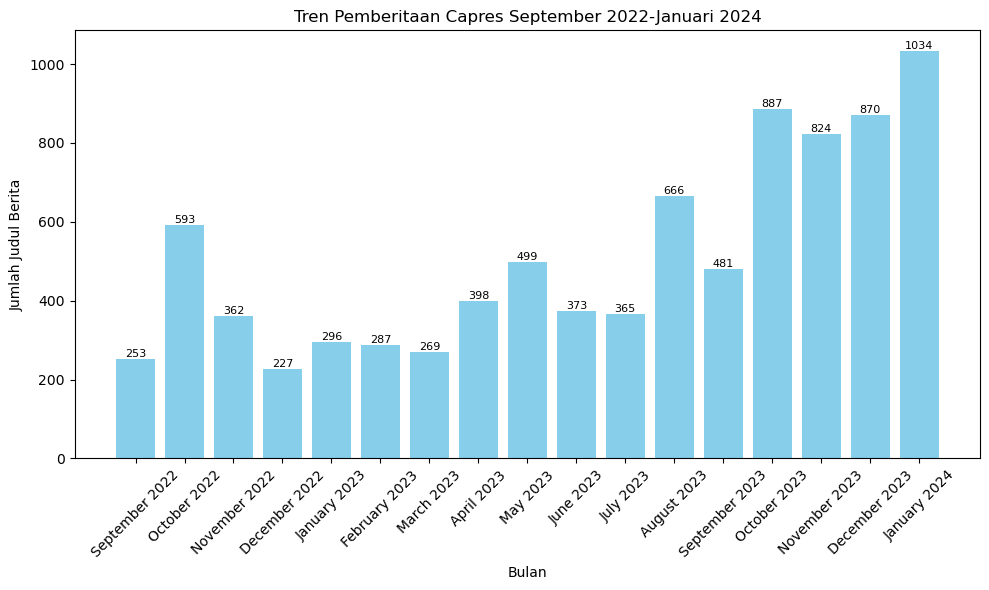

In [12]:
# Mapping month numbers to full month names
month_mapping = {
    1: 'September 2022',
    2: 'October 2022',
    3: 'November 2022',
    4: 'December 2022',
    5: 'January 2023',
    6: 'February 2023',
    7: 'March 2023',
    8: 'April 2023',
    9: 'May 2023',
    10: 'June 2023',
    11: 'July 2023',
    12: 'August 2023',
    13: 'September 2023',
    14: 'October 2023',
    15: 'November 2023',
    16: 'December 2023',
    17: 'January 2024',
}
# BAR CHART
plt.figure(figsize=(10, 6))
bars = plt.bar(news_count_sorted.index + 1, news_count_sorted['count'], color='skyblue')  # Use index + 1 as x-values

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres September 2022-Januari 2024')

# Change x-axis labels to month names based on the mapping
plt.xticks(news_count_sorted.index + 1, [month_mapping[i] for i in news_count_sorted.index + 1], rotation=45)

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

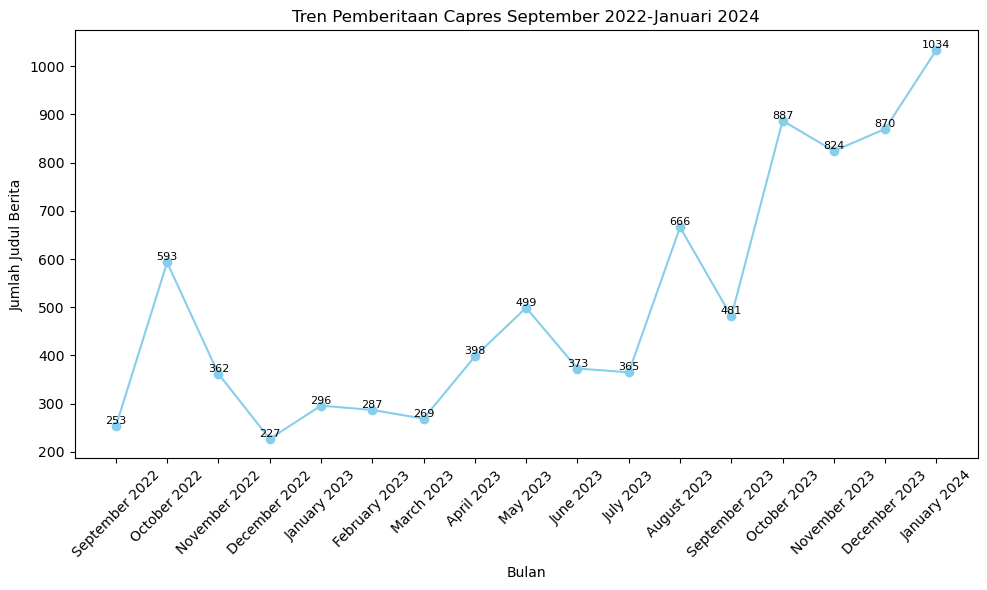

In [13]:
# LINE CHART
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(news_count_sorted['month_year_str'], news_count_sorted['count'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres September 2022-Januari 2024')
#plt.xticks(rotation=45)
plt.xticks(news_count_sorted.index , [month_mapping[i] for i in news_count_sorted.index +1], rotation=45)

# Adding data labels to points
for i, txt in enumerate(news_count_sorted['count']):
    plt.annotate(txt, (news_count_sorted['month_year_str'].iloc[i], news_count_sorted['count'].iloc[i]), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


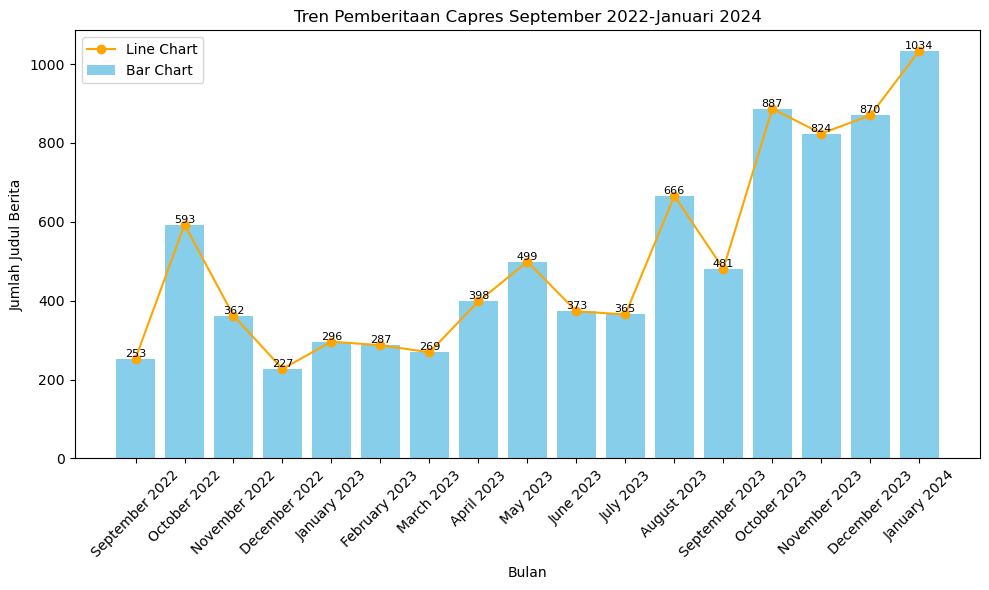

In [14]:
# GABUNGAN BAR CHART DAN LINE CHART 

plt.figure(figsize=(10, 6))

# Plotting the bar chart
bars = plt.bar(news_count_sorted['month_year_str'], news_count_sorted['count'], color='skyblue', label='Bar Chart')

# Plotting the line chart
plt.plot(news_count_sorted['month_year_str'], news_count_sorted['count'], marker='o', linestyle='-', color='orange', label='Line Chart')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres September 2022-Januari 2024')
#plt.xticks(rotation=45)
plt.xticks(news_count_sorted.index, [month_mapping[i] for i in news_count_sorted.index + 1], rotation=45)

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.legend()  # Show legend
plt.tight_layout()
plt.show()

In [21]:
# FUNCTION PREPROCESSING

def preprocess_text(kalimat):
    # Mengubah kalimat menjadi huruf kecil
    #lower_case = kalimat.lower()
    if isinstance(kalimat, str):
        # Mengubah kalimat menjadi huruf kecil
        lower_case = kalimat.lower()
        # Menghapus angka dari kalimat
        #hasil = re.sub(r"\d+", "", lower_case)
        hasil = re.sub(r'[,()\d]+', '', lower_case) 
        
        return hasil
    else:
        return kalimat
    
    # Menghapus hashtag
    hasil = re.sub(r'#\w+', '', hasil)
    hasil = re.sub(r'@\w+', '', hasil)
    hasil = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", hasil)

    # Menghapus tanda baca dari kalimat
    hasil = hasil.translate(str.maketrans("", "", string.punctuation))

    # Menghapus spasi pada awal dan akhir kalimat
    hasil = hasil.strip()

    # Menghilangkan Tanda Baca
    hasil = hasil.translate(str.maketrans('', '', string.punctuation))

    # Mengganti karakter HTML dengan tanda petik
    hasil = re.sub('<.*?>', ' ', hasil)

    # Mempertimbangkan huruf dan angka
    hasil = re.sub('[^a-zA-Z0-9]', ' ', hasil)

    # Mengganti line baru dengan spasi
    hasil = re.sub("\n", " ", hasil)

    # Menghapus single char
    hasil = re.sub(r"\b[a-zA-Z]\b", " ", hasil)

    # Memisahkan dan menggabungkan kata
    hasil = ' '.join(hasil.split())

    return hasil

In [23]:
# MERGE JUDUL & ISI BERITA
news['merged_text'] = news['Headline'] + ' ' + news['Content']

# DO PREPROCESSING
news['merged_text_pre'] = news['merged_text'].apply(preprocess_text)
news.head()

,Date,Headline,Link,Content,Date_as_datetime,date,month_year,time,month_year_str,month_year_dt,merged_text,merged_text_pre
0,30 Jan 2024 22:20,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,https://www.detik.com/jogja/berita/d-7168915/g...,Capres nomor urut 3 Ganjar Pranowo merasa terh...,2024-01-30 22:20:00,30,01-2024,22:20:00,01-2024,2024-01-01,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,ganjar terharu-optimis jemput kemenangan usai ...
1,30 Jan 2024 22:00,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,https://www.detik.com/jabar/berita/d-7168540/j...,Sejumlah peristiwa mewarnai pemberitaan di Jaw...,2024-01-30 22:00:00,30,01-2024,22:00:00,01-2024,2024-01-01,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,jabar hari ini: sadisnya toto penggembala bebe...
2,30 Jan 2024 21:54,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",https://news.detik.com/pemilu/d-7168890/tom-le...,"Capres nomor urut 1, Anies Baswedan, menanggap...",2024-01-30 21:54:00,30,01-2024,21:54:00,01-2024,2024-01-01,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",tom lembong dilaporkan ke bawaslu anies bilang...
3,30 Jan 2024 21:38,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,https://news.detik.com/pemilu/d-7168875/ganjar...,Capres nomor urut 3 Ganjar Pranowo melakukan k...,2024-01-30 21:38:00,30,01-2024,21:38:00,01-2024,2024-01-01,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,ganjar terharu pendukung hujan-hujanan hadiri ...
4,30 Jan 2024 21:30,Ganjar Puji Militansi Warga Malang Hujan-hujan...,https://www.detik.com/jatim/berita/d-7168867/g...,Capres nomor urut 03 Ganjar Pranowo memuji mil...,2024-01-30 21:30:00,30,01-2024,21:30:00,01-2024,2024-01-01,Ganjar Puji Militansi Warga Malang Hujan-hujan...,ganjar puji militansi warga malang hujan-hujan...


In [26]:
def label_words_in_dataframe(news, column_name, label_capres):
    labels_news = pd.read_csv(label_capres)

    # Ubah DataFrame menjadi dictionary
    keyword_to_label = labels_news.set_index('keyword')['label'].to_dict()
    labeled_data = []

    for sentence in news[column_name]:
        # Pisahkan kalimat menjadi kata-kata
        words = sentence.split(' ')
        # Inisialisasi list kosong untuk menyimpan label kata dalam kalimat
        labels = []
        # Iterasi melalui kata-kata dalam kalimat
        for word in words:
            # Jika kata adalah kata kunci, berikan label yang sesuai
            if word in keyword_to_label:
                labels.append(keyword_to_label[word])
           
        # Gabungkan label menjadi string dan tambahkan ke data yang telah diberi label
        labeled_data.append(' '.join(labels))

    # Tambahkan data yang telah diberi label sebagai kolom baru ke DataFrame Anda
    news['category'] = labeled_data

    return news

In [27]:
label_capres = 'label_map.csv'
news['merged_text_pre'] = news['merged_text_pre'].astype(str) # Convert the column to string type
news = label_words_in_dataframe(news, 'merged_text_pre', label_capres)
news.head(10)

,Date,Headline,Link,Content,Date_as_datetime,date,month_year,time,month_year_str,month_year_dt,merged_text,merged_text_pre,category
0,30 Jan 2024 22:20,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,https://www.detik.com/jogja/berita/d-7168915/g...,Capres nomor urut 3 Ganjar Pranowo merasa terh...,2024-01-30 22:20:00,30,01-2024,22:20:00,01-2024,2024-01-01,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,ganjar terharu-optimis jemput kemenangan usai ...,Paslon 3 Paslon 3 Paslon 3 Paslon 3 Paslon 3 P...
1,30 Jan 2024 22:00,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,https://www.detik.com/jabar/berita/d-7168540/j...,Sejumlah peristiwa mewarnai pemberitaan di Jaw...,2024-01-30 22:00:00,30,01-2024,22:00:00,01-2024,2024-01-01,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,jabar hari ini: sadisnya toto penggembala bebe...,
2,30 Jan 2024 21:54,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",https://news.detik.com/pemilu/d-7168890/tom-le...,"Capres nomor urut 1, Anies Baswedan, menanggap...",2024-01-30 21:54:00,30,01-2024,21:54:00,01-2024,2024-01-01,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",tom lembong dilaporkan ke bawaslu anies bilang...,Paslon 1 Paslon 1 Paslon 1 Paslon 1 Paslon 1 P...
3,30 Jan 2024 21:38,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,https://news.detik.com/pemilu/d-7168875/ganjar...,Capres nomor urut 3 Ganjar Pranowo melakukan k...,2024-01-30 21:38:00,30,01-2024,21:38:00,01-2024,2024-01-01,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,ganjar terharu pendukung hujan-hujanan hadiri ...,Paslon 3 Paslon 3 Paslon 3 Paslon 3 Paslon 3 P...
4,30 Jan 2024 21:30,Ganjar Puji Militansi Warga Malang Hujan-hujan...,https://www.detik.com/jatim/berita/d-7168867/g...,Capres nomor urut 03 Ganjar Pranowo memuji mil...,2024-01-30 21:30:00,30,01-2024,21:30:00,01-2024,2024-01-01,Ganjar Puji Militansi Warga Malang Hujan-hujan...,ganjar puji militansi warga malang hujan-hujan...,Paslon 3 Paslon 3 Paslon 3 Paslon 3 Paslon 3
5,30 Jan 2024 21:26,Penjelasan KPU Blora soal Gambar 4 Paslon di S...,https://www.detik.com/jateng/berita/d-7168866/...,Komisi Pemilihan Umum (KPU) Kabupaten Blora me...,2024-01-30 21:26:00,30,01-2024,21:26:00,01-2024,2024-01-01,Penjelasan KPU Blora soal Gambar 4 Paslon di S...,penjelasan kpu blora soal gambar paslon di si...,
6,30 Jan 2024 20:00,"Selain Kabid SMP, Ini Daftar Pelanggar Netrali...",https://www.detik.com/sumut/hukum-dan-kriminal...,Bawaslu Medan menyatakan Kabid SMP Dinas Pendi...,2024-01-30 20:00:00,30,01-2024,20:00:00,01-2024,2024-01-01,"Selain Kabid SMP, Ini Daftar Pelanggar Netrali...",selain kabid smp ini daftar pelanggar netralit...,
7,30 Jan 2024 19:13,Semangat Pemain Bantengan Diguyur Hujan Saat K...,https://www.detik.com/jatim/berita/d-7168645/s...,Hujan deras tak menyurutkan semangat ratusan p...,2024-01-30 19:13:00,30,01-2024,19:13:00,01-2024,2024-01-01,Semangat Pemain Bantengan Diguyur Hujan Saat K...,semangat pemain bantengan diguyur hujan saat k...,Paslon 3 Paslon 3 Paslon 3 Paslon 3 Paslon 3 P...
8,30 Jan 2024 19:12,Muzani Tegaskan Masyarakat Sumbar Tidak Tingga...,https://news.detik.com/pemilu/d-7168644/muzani...,Sekjen Partai Gerindra Ahmad Muzani menghadiri...,2024-01-30 19:12:00,30,01-2024,19:12:00,01-2024,2024-01-01,Muzani Tegaskan Masyarakat Sumbar Tidak Tingga...,muzani tegaskan masyarakat sumbar tidak tingga...,Paslon 2 Paslon 2 Paslon 2 Paslon 2 Paslon 2 P...
9,30 Jan 2024 18:42,"Kampanye di Brebes, Anies: 100 Hari Kerja Atas...",https://www.detik.com/jateng/berita/d-7168592/...,Capres nomor urut 1 Anies Baswedan kampanye di...,2024-01-30 18:42:00,30,01-2024,18:42:00,01-2024,2024-01-01,"Kampanye di Brebes, Anies: 100 Hari Kerja Atas...",kampanye di brebes anies: hari kerja atasi ma...,Paslon 1 Paslon 1 Paslon 1 Paslon 1 Paslon 1 P...


In [29]:
#filter kata
words_to_count = ["Paslon 1", "Paslon 2", "Paslon 3"]
# Convert 'Keterangan' column to lowercase for case-insensitive counting
news['category'] = news['category'].str.lower()

# Count occurrences of each word
word_counts = {word: news['category'].str.count(word.lower()).sum() for word in words_to_count}

# Display the counts for each word
for word, count in word_counts.items():
    print(f"The word '{word}' appears {count} times.")

The word 'Paslon 1' appears 24171 times.
The word 'Paslon 2' appears 25413 times.
The word 'Paslon 3' appears 22232 times.


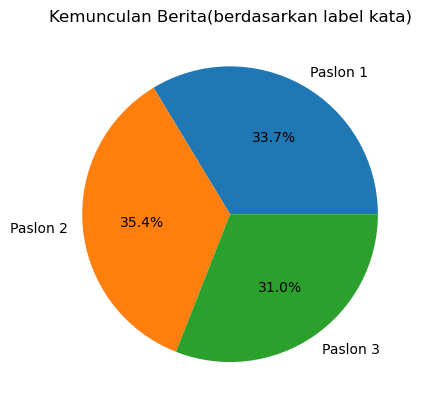

In [32]:
# Calculate the total count
total_count = sum(word_counts.values())

# Calculate the percentages
percentages = [count/total_count * 100 for count in word_counts.values()]

# Plot the pie chart
plt.pie(percentages, labels=word_counts.keys(), autopct='%1.1f%%')
plt.title('Kemunculan Berita(berdasarkan label kata)')
plt.show()

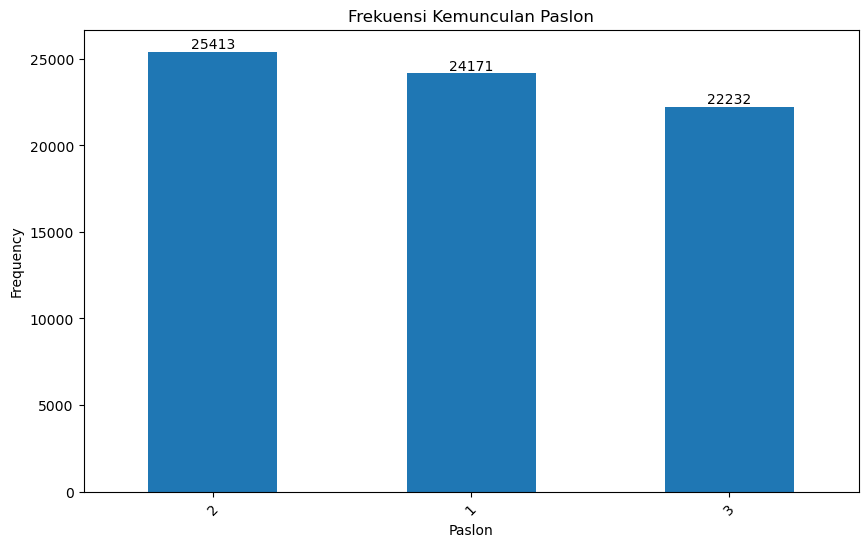

In [34]:
# COBA CARA GAMPANG
word_counts = (news['category'].str.split().explode()
                              .value_counts()
                              .sort_values(ascending=False)
                              .drop('paslon')) 


# Plotting the word frequency
plt.figure(figsize=(10, 6))
ax = word_counts[:20].plot(kind='bar')  # Get the Axes object for label placement
#word_counts[:20].plot(kind='bar')
plt.xlabel('Paslon')
plt.ylabel('Frequency')
plt.title('Frekuensi Kemunculan Paslon')
plt.xticks(rotation=45)
# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",  # Format the value as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Place label above the bar
                ha='center', va='bottom')
plt.show()

In [39]:
# @title label_map dan fungsi labeling
def labeling_text(text, label_map):
  group_word = {key: [] for key in label_map.keys()}
  for word in text.split():
      for label, keywords in label_map.items():
          # Memeriksa apakah kata secara eksak cocok dengan salah satu keyword
          if word in keywords:
              group_word[label].append(word)

  # muncul setidaknya 10x dalam 1 dataset
  valid_data = {k: v for k, v in group_word.items() if len(v) > 10}
  if not valid_data:
        return np.nan

  label = max(valid_data, key=lambda k: len(valid_data[k])) if any(valid_data.values()) else np.nan
  return label

label_map={
    'paslon_1':[
        'anies', 'baswedan', 'anies baswedan',
        'amin', 'muhaimin','iskandar', 'muhaimin iskandar', 'cak imin',
        'anies muhaimin'
    ],
    'paslon_2':[
        'prabowo', 'subianto', 'prabowo subianto',
        'gibran', 'rakabuming', 'gibran rakabuming',
        'prabowo gibran'
    ],
    'paslon_3':[
        'ganjar', 'pranowo','ganjar pranowo',
        'mahfud',
        'ganjar mahfud'
    ]
}

In [41]:
#kemunculan paslon per berita
news['label'] = news['merged_text_pre'].apply(lambda x: labeling_text(x, label_map))
news.tail(10)

,Date,Headline,Link,Content,Date_as_datetime,date,month_year,time,month_year_str,month_year_dt,merged_text,merged_text_pre,category,label
8674,08 Sep 2022 22:01,Ibu-ibu di Gresik Dukung Gus Muhaimin Nyapres ...,https://news.detik.com/berita/d-6281056/ibu-ib...,"Ribuan ibu-ibu di Kabupaten Gresik, Jawa Timur...",2022-09-08 22:01:00,8,09-2022,22:01:00,09-2022,2022-09-01,Ibu-ibu di Gresik Dukung Gus Muhaimin Nyapres ...,ibu-ibu di gresik dukung gus muhaimin nyapres ...,paslon 1 paslon 1 paslon 1 paslon 1 paslon 1 p...,NaN
8675,08 Sep 2022 13:58,"NasDem Umumkan Bakal Capres 10 November, PAN I...",https://news.detik.com/pemilu/d-6279897/nasdem...,PAN ikut menyambut baik rencana Partai NasDem ...,2022-09-08 13:58:00,8,09-2022,13:58:00,09-2022,2022-09-01,"NasDem Umumkan Bakal Capres 10 November, PAN I...",nasdem umumkan bakal capres november pan inga...,paslon 3 paslon 3 paslon 1,NaN
8676,08 Sep 2022 11:54,Mardani soal Koalisi: PKS Dekat dengan NasDem-...,https://news.detik.com/pemilu/d-6279579/mardan...,Ketua DPP PKS Mardani Ali Sera mengungkap perk...,2022-09-08 11:54:00,8,09-2022,11:54:00,09-2022,2022-09-01,Mardani soal Koalisi: PKS Dekat dengan NasDem-...,mardani soal koalisi: pks dekat dengan nasdem-...,paslon 1 paslon 1 paslon 1 paslon 1 paslon 3 p...,NaN
8677,08 Sep 2022 10:42,Kalkulasi Pendamping Prabowo,https://news.detik.com/kolom/d-6279424/kalkula...,"Koalisi dua partai besar, Gerindra dan PKB, me...",2022-09-08 10:42:00,8,09-2022,10:42:00,09-2022,2022-09-01,Kalkulasi Pendamping Prabowo Koalisi dua parta...,kalkulasi pendamping prabowo koalisi dua parta...,paslon 2 paslon 2 paslon 2 paslon 2 paslon 2 p...,paslon_1
8678,08 Sep 2022 10:17,Jawaban Sandiaga Uno Disebut Pengkhianat Gerindra,https://www.detik.com/bali/berita/d-6279382/ja...,Politikus Gerindra Arief Poyuono menyebut Sand...,2022-09-08 10:17:00,8,09-2022,10:17:00,09-2022,2022-09-01,Jawaban Sandiaga Uno Disebut Pengkhianat Gerin...,jawaban sandiaga uno disebut pengkhianat gerin...,paslon 2 paslon 2 paslon 2 paslon 2 paslon 2,NaN
8679,08 Sep 2022 08:46,Demokrat Sambut Baik NasDem Umumkan Bacapres 1...,https://news.detik.com/pemilu/d-6279239/demokr...,Partai Demokrat (PD) menyambut baik kabar Part...,2022-09-08 08:46:00,8,09-2022,08:46:00,09-2022,2022-09-01,Demokrat Sambut Baik NasDem Umumkan Bacapres 1...,demokrat sambut baik nasdem umumkan bacapres ...,paslon 3 paslon 3 paslon 1 paslon 1,NaN
8680,08 Sep 2022 08:32,Teka-teki Bakal Capres NasDem di Hari Pahlawan,https://news.detik.com/pemilu/d-6279225/teka-t...,Partai NasDem sampai saat ini belum juga mengu...,2022-09-08 08:32:00,8,09-2022,08:32:00,09-2022,2022-09-01,Teka-teki Bakal Capres NasDem di Hari Pahlawan...,teka-teki bakal capres nasdem di hari pahlawan...,paslon 3 paslon 3 paslon 1 paslon 1 paslon 1 p...,NaN
8681,08 Sep 2022 06:35,Anies dan Ganjar Bisa Maju Sebagai Capres atau...,https://news.detik.com/berita/d-6279136/anies-...,Ketua Umum Partai Nasdem Surya Paloh mengataka...,2022-09-08 06:35:00,8,09-2022,06:35:00,09-2022,2022-09-01,Anies dan Ganjar Bisa Maju Sebagai Capres atau...,anies dan ganjar bisa maju sebagai capres atau...,paslon 1 paslon 3 paslon 2 paslon 2 paslon 3 p...,NaN
8682,07 Sep 2022 21:53,"Survei Capres Indo Riset: Ganjar 23,2 Persen, ...",https://news.detik.com/pemilu/d-6278939/survei...,Lembaga survei Indo Riset merilis hasil survei...,2022-09-07 21:53:00,7,09-2022,21:53:00,09-2022,2022-09-01,"Survei Capres Indo Riset: Ganjar 23,2 Persen, ...",survei capres indo riset: ganjar persen disus...,paslon 3 paslon 2 paslon 1 paslon 3 paslon 3 p...,NaN
8683,07 Sep 2022 16:35,Cak Imin soal Duet Prabowo-Puan: Kalau Mau Men...,https://news.detik.com/pemilu/d-6278255/cak-im...,Ketua Umum PKB Abdul Muhaimin Iskandar (Cak Im...,2022-09-07 16:35:00,7,09-2022,16:35:00,09-2022,2022-09-01,Cak Imin soal Duet Prabowo-Puan: Kalau Mau Men...,cak imin soal duet prabowo-puan: kalau mau men...,paslon 1 paslon 1 paslon 2 paslon 2 paslon 2 p...,NaN


In [47]:
grouped_data = news.groupby('label')['merged_text_pre'].count().reset_index(name='Topik Berita')
grouped_data

,label,Topik Berita
0,paslon_1,699
1,paslon_2,769
2,paslon_3,543


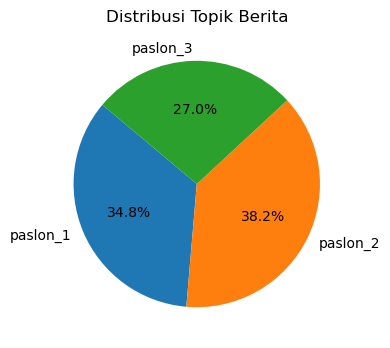

In [46]:
plt.figure(figsize=(6, 4))
plt.pie(grouped_data['Topik Berita'], labels=grouped_data['label'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Topik Berita')
plt.show()

In [49]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(kalimat):
    if isinstance(kalimat, str):
        tokens = nltk.tokenize.word_tokenize(kalimat)
        return tokens
    else:
        return []

news['token'] = news['merged_text_pre'].fillna('').apply(tokenize_text)
news.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paulooo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Date,Headline,Link,Content,Date_as_datetime,date,month_year,time,month_year_str,month_year_dt,merged_text,merged_text_pre,category,label,token
0,30 Jan 2024 22:20,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,https://www.detik.com/jogja/berita/d-7168915/g...,Capres nomor urut 3 Ganjar Pranowo merasa terh...,2024-01-30 22:20:00,30,01-2024,22:20:00,01-2024,2024-01-01,Ganjar Terharu-Optimis Jemput Kemenangan Usai ...,ganjar terharu-optimis jemput kemenangan usai ...,paslon 3 paslon 3 paslon 3 paslon 3 paslon 3 p...,NaN,"[ganjar, terharu-optimis, jemput, kemenangan, ..."
1,30 Jan 2024 22:00,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,https://www.detik.com/jabar/berita/d-7168540/j...,Sejumlah peristiwa mewarnai pemberitaan di Jaw...,2024-01-30 22:00:00,30,01-2024,22:00:00,01-2024,2024-01-01,Jabar Hari Ini: Sadisnya Toto Penggembala Bebe...,jabar hari ini: sadisnya toto penggembala bebe...,,NaN,"[jabar, hari, ini, :, sadisnya, toto, penggemb..."
2,30 Jan 2024 21:54,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",https://news.detik.com/pemilu/d-7168890/tom-le...,"Capres nomor urut 1, Anies Baswedan, menanggap...",2024-01-30 21:54:00,30,01-2024,21:54:00,01-2024,2024-01-01,"Tom Lembong Dilaporkan ke Bawaslu, Anies Bilan...",tom lembong dilaporkan ke bawaslu anies bilang...,paslon 1 paslon 1 paslon 1 paslon 1 paslon 1 p...,NaN,"[tom, lembong, dilaporkan, ke, bawaslu, anies,..."
3,30 Jan 2024 21:38,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,https://news.detik.com/pemilu/d-7168875/ganjar...,Capres nomor urut 3 Ganjar Pranowo melakukan k...,2024-01-30 21:38:00,30,01-2024,21:38:00,01-2024,2024-01-01,Ganjar Terharu Pendukung Hujan-hujanan Hadiri ...,ganjar terharu pendukung hujan-hujanan hadiri ...,paslon 3 paslon 3 paslon 3 paslon 3 paslon 3 p...,NaN,"[ganjar, terharu, pendukung, hujan-hujanan, ha..."
4,30 Jan 2024 21:30,Ganjar Puji Militansi Warga Malang Hujan-hujan...,https://www.detik.com/jatim/berita/d-7168867/g...,Capres nomor urut 03 Ganjar Pranowo memuji mil...,2024-01-30 21:30:00,30,01-2024,21:30:00,01-2024,2024-01-01,Ganjar Puji Militansi Warga Malang Hujan-hujan...,ganjar puji militansi warga malang hujan-hujan...,paslon 3 paslon 3 paslon 3 paslon 3 paslon 3,NaN,"[ganjar, puji, militansi, warga, malang, hujan..."


In [60]:
def stopword_text(tokens):
    stopwords = pd.read_csv('stop_words_idn.txt', header=None)[0].tolist()
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

news['token_clean'] = news['token'].apply(stopword_text)

In [61]:
print(news['token_clean'],10)
print(news['token'],10)

0       [ganjar, terharu-optimis, jemput, kemenangan, ...
1       [jabar, hari, ini, :, sadisnya, toto, penggemb...
2       [tom, lembong, dilaporkan, ke, bawaslu, anies,...
3       [ganjar, terharu, pendukung, hujan-hujanan, ha...
4       [ganjar, puji, militansi, warga, malang, hujan...
                              ...                        
8679    [demokrat, sambut, baik, nasdem, umumkan, baca...
8680    [teka-teki, bakal, capres, nasdem, di, hari, p...
8681    [anies, dan, ganjar, bisa, maju, sebagai, capr...
8682    [survei, capres, indo, riset, :, ganjar, perse...
8683    [cak, imin, soal, duet, prabowo-puan, :, kalau...
Name: token_clean, Length: 8684, dtype: object 10
0       [ganjar, terharu-optimis, jemput, kemenangan, ...
1       [jabar, hari, ini, :, sadisnya, toto, penggemb...
2       [tom, lembong, dilaporkan, ke, bawaslu, anies,...
3       [ganjar, terharu, pendukung, hujan-hujanan, ha...
4       [ganjar, puji, militansi, warga, malang, hujan...
                      

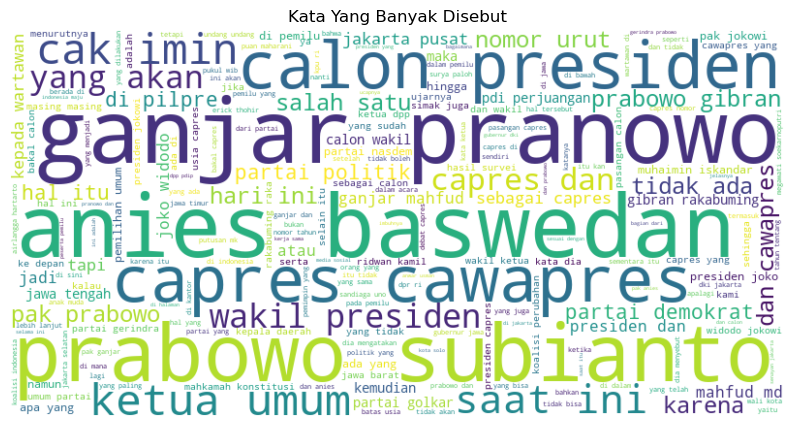

In [62]:
datax=news
datax['text22'] = datax['token_clean'].apply(lambda x: str(x).replace('[', '').replace(']', '').replace(',', '').replace("'",''))
#datax.head()
text2 = ' '.join(datax['text22'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Yang Banyak Disebut')
plt.show()